In [ ]:
#instalando o enlazando con kaggle
!pip install kaggle

#previamente debemos obtener el key o llave "kaggle.json" esto se obtiene entrando a nuestra cuenta de kaggle y luego 
#"Account", y hacer clic en el botón "Create New API Token"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"denysalexander","key":"38f36dea5941d922e53ae72245217782"}'}

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
#para mover el json

#!chmod 600 ~/.kaggle/kaggle.json
#!kaggle datasets download -d Dog_Emotion

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d danielshanbalico/dog-emotion

100% 155M/155M [00:09<00:00, 20.5MB/s]
100% 155M/155M [00:09<00:00, 17.4MB/s]


In [ ]:
!unzip dog-emotion.zip


Archive:  dog-emotion.zip
  inflating: Dog Emotion/angry/09dUVMcjCDfOtbeYDQg5Fvu3GPHWJg811.jpg  
  inflating: Dog Emotion/angry/0AvKtuzA7LfxnKaO0bey9mQMLnxXad73.jpg  
  inflating: Dog Emotion/angry/0C5yo7GxMy8lztxNZvSdfEx2gSPRTR701.jpg  
  inflating: Dog Emotion/angry/0C9jEgFQHsh36W5U2u5CA98lB7C5eX806.jpg  
  inflating: Dog Emotion/angry/0RXraPIKC00Dz1qkuMbj8XbuR80g5Z893.jpg  
  inflating: Dog Emotion/angry/0TSpHUDh1xIQthYrtH8E1UZQ72rcTZ68.jpg  
  inflating: Dog Emotion/angry/0aNyXBrmNA7XdefwHvgO2n1rnpqQAp885.jpg  
  inflating: Dog Emotion/angry/0dWl0dRT9Pc98fjFSvGOXlGlE0B4E6267.jpg  
  inflating: Dog Emotion/angry/0da4j6Ehkb6Ml0YBRiWmsBU2wEMoXP409.jpg  
  inflating: Dog Emotion/angry/0jgI6KwR6IGvq9CAMBB3srLRa0W7z7192.jpg  
  inflating: Dog Emotion/angry/0nhvFJW7Q5S48PygRMOimUipiYweig911.jpg  
  inflating: Dog Emotion/angry/0qqRaCQQtAQj2PGIRQrNJa1rnnx36W620.jpg  
  inflating: Dog Emotion/angry/0rAH60FVXqnFBJPzGVSxzEe22APpFS734.jpg  
  inflating: Dog Emotion/angry/0rdx3OrwENAIWpp9Bunro1

In [ ]:
import os 

PATH = 'Dog Emotion'

classes = os.listdir(PATH)
classes

['relaxed', 'sad', 'labels.csv', 'angry', 'happy']

In [ ]:
classes.pop(2)

'labels.csv'

In [ ]:
classes

['relaxed', 'sad', 'angry', 'happy']

In [ ]:

imgs, labels = [], []

for i, lab in enumerate(classes):
  paths = os.listdir(f'{PATH}/{lab}')
  print(f'Categoría: {lab}. Imágenes: {len(paths)}')
  paths = [p for p in paths if p[-3:] == "jpg"]
  imgs += [f'{PATH}/{lab}/{img}' for img in paths]
  labels += [i]*len(paths)

Categoría: relaxed. Imágenes: 1000
Categoría: sad. Imágenes: 1000
Categoría: angry. Imágenes: 1000
Categoría: happy. Imágenes: 1000


In [ ]:
#imgs[:4]
len(imgs)

3975

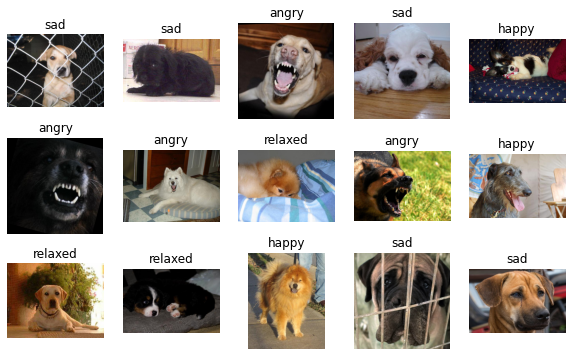

In [ ]:
import random 
from skimage import io
import matplotlib.pyplot as plt

fig, axs = plt.subplots(3,5, figsize=(10,6))
for _ax in axs:
  for ax in _ax:
    ix = random.randint(0, len(imgs)-1)
    img = io.imread(imgs[ix])
    ax.imshow(img)
    ax.axis('off')
    ax.set_title(classes[labels[ix]])
plt.show()

In [ ]:
#esta parte se encarga de dividar los datos en entrenamiento y prueba con sus labels
from sklearn.model_selection import train_test_split

train_imgs, test_imgs, train_labels, test_labels = train_test_split(imgs, labels, test_size=0.2, stratify=labels)

len(train_imgs), len(test_imgs)

(3180, 795)

In [ ]:
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"

class Dataset(torch.utils.data.Dataset):
  def __init__(self, X, y, trans, device):
    self.X = X
    self.y = y
    self.trans = trans
    self.device = device

  def __len__(self):
    return len(self.X)

  def __getitem__(self, ix):
    # cargar la imágen
    img = io.imread(self.X[ix])
    # aplicar transformaciones
    #print(f"imagen: {img}")
    if self.trans:
      img = self.trans(image=img)["image"]
    return torch.from_numpy(img / 255.).float().permute(2,0,1), torch.tensor(self.y[ix])

In [ ]:
#nos aseguramos que todas las imagenes tengan el mmismo tamaño en este caso 224x224
import albumentations as A

trans = A.Compose([
    A.Resize(224, 224)
])

dataset = {
    'train': Dataset(train_imgs, train_labels, trans, device), 
    'test': Dataset(test_imgs, test_labels, trans, device)
}

len(dataset['train']), len(dataset['test'])

(3180, 795)

In [ ]:
dataset['train'][2]

(tensor([[[0.2039, 0.1843, 0.1686,  ..., 0.0863, 0.0980, 0.0980],
          [0.1882, 0.1882, 0.1922,  ..., 0.0863, 0.0941, 0.0941],
          [0.1725, 0.1882, 0.2118,  ..., 0.0824, 0.0863, 0.0863],
          ...,
          [0.1569, 0.2588, 0.2431,  ..., 0.1686, 0.1804, 0.2078],
          [0.0902, 0.1961, 0.2471,  ..., 0.2314, 0.2275, 0.2275],
          [0.0627, 0.2000, 0.1882,  ..., 0.2588, 0.2078, 0.1922]],
 
         [[0.2863, 0.2706, 0.2588,  ..., 0.0980, 0.1020, 0.1020],
          [0.2706, 0.2745, 0.2824,  ..., 0.0941, 0.0980, 0.0980],
          [0.2471, 0.2706, 0.3020,  ..., 0.0941, 0.0902, 0.0902],
          ...,
          [0.3216, 0.4275, 0.4235,  ..., 0.2039, 0.2000, 0.2275],
          [0.2549, 0.3608, 0.4235,  ..., 0.2667, 0.2471, 0.2471],
          [0.2275, 0.3686, 0.3686,  ..., 0.2902, 0.2314, 0.2118]],
 
         [[0.4784, 0.4588, 0.4392,  ..., 0.0980, 0.1098, 0.1098],
          [0.4588, 0.4510, 0.4588,  ..., 0.0980, 0.1059, 0.1059],
          [0.4235, 0.4392, 0.4667,  ...,

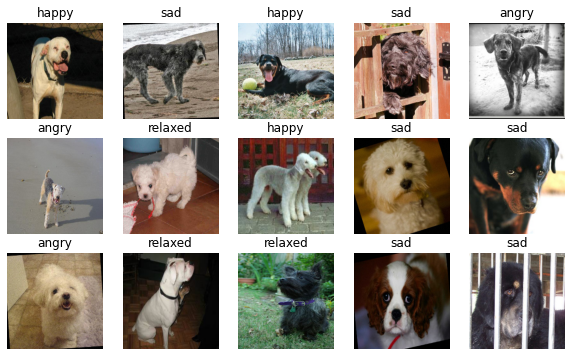

In [ ]:
fig, axs = plt.subplots(3,5, figsize=(10,6))
for _ax in axs:
  for ax in _ax:
    ix = random.randint(0, len(dataset['train'])-1)
    img, lab = dataset['train'][ix]
    ax.imshow(img.permute(1,2,0))
    ax.axis('off')
    ax.set_title(classes[lab])
plt.show()

In [ ]:
dataloader = {
    'train': torch.utils.data.DataLoader(dataset['train'], batch_size=64, shuffle=True, pin_memory=True), 
    'test': torch.utils.data.DataLoader(dataset['test'], batch_size=256, shuffle=False)
}

imgs, labels = next(iter(dataloader['train']))
imgs.shape

torch.Size([64, 3, 224, 224])

In [ ]:
#usando resnet
import torchvision

resnet = torchvision.models.resnet18()
resnet

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
class ModelCustom(torch.nn.Module):
  def __init__(self, n_outputs=4, pretrained=False, freeze=False):
    super().__init__()
    # descargamos resnet
    resnet = torchvision.models.resnet18(pretrained=pretrained)
    # nos quedamos con todas las capas menos la última
    self.resnet = torch.nn.Sequential(*list(resnet.children())[:-1])
    if freeze:
      for param in self.resnet.parameters():
        param.requires_grad=False
    # añadimos una nueva capa lineal para llevar a cabo la clasificación
    self.fc = torch.nn.Linear(512, 4)

  def forward(self, x):
    x = self.resnet(x)
    x = x.view(x.shape[0], -1)
    x = self.fc(x)
    return x

  def unfreeze(self):
    for param in self.resnet.parameters():
        param.requires_grad=True

^Este código define una clase de modelo personalizado llamado ModelCustom utilizando la librería PyTorch.

La clase ModelCustom es una subclase de la clase torch.nn.Module, lo que significa que hereda todas las propiedades y métodos de Module.

La función __init__ de la clase define la estructura del modelo. El modelo comienza descargando la arquitectura de ResNet-18 (pre-entrenado o no, según los parámetros especificados), y se eliminan las últimas capas de clasificación para poder añadir una nueva capa lineal personalizada fc con 5 salidas.

Si se especifica el argumento freeze como True, las capas de ResNet-18 se congelarán y no se actualizarán durante el entrenamiento. Esto puede ser útil cuando se utiliza un modelo pre-entrenado como base y se desea ajustar sólo las capas de clasificación.

La función forward de la clase define cómo se procesan los datos de entrada a través del modelo. Primero, las imágenes de entrada se pasan a través de la red ResNet-18 y se eliminan las últimas capas. A continuación, las características resultantes se aplastan y se pasan a través de la capa lineal personalizada fc para obtener las salidas de clasificación.

La función unfreeze de la clase se utiliza para descongelar las capas de ResNet-18 y permitir que se actualicen durante el entrenamiento.

In [ ]:
model_custom = ModelCustom()
outputs = model_custom(torch.randn(64, 3, 224, 224))
outputs.shape

/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


torch.Size([64, 4])

^Este código instancia un objeto model_custom de la clase ModelCustom y luego pasa un tensor aleatorio con forma (64, 3, 224, 224) a través del modelo para obtener la salida.

La forma (64, 3, 224, 224) representa un lote de 64 imágenes RGB de 224x224 píxeles cada una. La dimensión 3 se refiere a los tres canales de color (rojo, verde y azul).

La llamada al modelo model_custom(torch.randn(64, 3, 224, 224)) procesa este lote de imágenes a través de la red neuronal y devuelve una salida con forma (64, 4). La dimensión 64 se refiere al tamaño del lote y la dimensión 4 se refiere al número de clases de salida que se especificó en la capa lineal personalizada self.fc.

En resumen, la salida de la llamada al modelo model_custom en este caso tiene forma (64, 4) y representa las clasificaciones de las 64 imágenes de entrada en las 4 clases de salida.

In [ ]:
from tqdm import tqdm
import numpy as np

def fit(model, dataloader, epochs=5, lr=1e-2):
    model.to(device)
    optimizer = torch.optim.SGD(model.parameters(), lr=lr)
    criterion = torch.nn.CrossEntropyLoss()
    for epoch in range(1, epochs+1):
        model.train()
        train_loss, train_acc = [], []
        bar = tqdm(dataloader['train'])
        for batch in bar:
            X, y = batch
            X, y = X.to(device), y.to(device)
            optimizer.zero_grad()
            y_hat = model(X)
            loss = criterion(y_hat, y)
            loss.backward()
            optimizer.step()
            train_loss.append(loss.item())
            acc = (y == torch.argmax(y_hat, axis=1)).sum().item() / len(y)
            train_acc.append(acc)
            bar.set_description(f"loss {np.mean(train_loss):.5f} acc {np.mean(train_acc):.5f}")
        bar = tqdm(dataloader['test'])
        val_loss, val_acc = [], []
        model.eval()
        with torch.no_grad():
            for batch in bar:
                X, y = batch
                X, y = X.to(device), y.to(device)
                y_hat = model(X)
                loss = criterion(y_hat, y)
                val_loss.append(loss.item())
                acc = (y == torch.argmax(y_hat, axis=1)).sum().item() / len(y)
                val_acc.append(acc)
                bar.set_description(f"val_loss {np.mean(val_loss):.5f} val_acc {np.mean(val_acc):.5f}")
        print(f"Epoch {epoch}/{epochs} loss {np.mean(train_loss):.5f} val_loss {np.mean(val_loss):.5f} acc {np.mean(train_acc):.5f} val_acc {np.mean(val_acc):.5f}")

Este código define una función fit que entrena un modelo de red neuronal utilizando el método de descenso de gradiente estocástico (SGD).

La función toma como entrada un objeto model de la clase torch.nn.Module, un objeto dataloader que contiene los datos de entrenamiento y prueba en forma de lotes, el número de epochs de entrenamiento y la tasa de aprendizaje lr.

En cada epoch, la función entrena el modelo con los datos de entrenamiento y evalúa el modelo con los datos de prueba. En cada iteración de entrenamiento, se calcula el error de predicción (loss) entre las etiquetas de salida (y) y las predicciones del modelo (y_hat) y se retropropaga el error a través de la red para ajustar los pesos (optimizer.step()).

El proceso de entrenamiento se muestra en una barra de progreso con información sobre la pérdida (loss) y la precisión (acc) en el conjunto de entrenamiento. El proceso de evaluación se muestra en otra barra de progreso con información sobre la pérdida (val_loss) y la precisión (val_acc) en el conjunto de prueba.

La función fit imprime los valores de pérdida y precisión en el conjunto de entrenamiento y prueba para cada epoch.

In [ ]:
model_c = ModelCustom()
fit(model_c, dataloader, epochs=15)

val_loss 1.36060 val_acc 0.33326: 100%|██████████| 4/4 [00:04<00:00,  1.03s/it]


Epoch 1/15 loss 1.39122 val_loss 1.36060 acc 0.27219 val_acc 0.33326


val_loss 1.40341 val_acc 0.30310: 100%|██████████| 4/4 [00:04<00:00,  1.01s/it]


Epoch 2/15 loss 1.35650 val_loss 1.40341 acc 0.30872 val_acc 0.30310


val_loss 1.51269 val_acc 0.25427: 100%|██████████| 4/4 [00:04<00:00,  1.17s/it]


Epoch 3/15 loss 1.33609 val_loss 1.51269 acc 0.34443 val_acc 0.25427


val_loss 1.40406 val_acc 0.23434: 100%|██████████| 4/4 [00:04<00:00,  1.13s/it]


Epoch 4/15 loss 1.31411 val_loss 1.40406 acc 0.34813 val_acc 0.23434


val_loss 1.41206 val_acc 0.30845: 100%|██████████| 4/4 [00:04<00:00,  1.03s/it]


Epoch 5/15 loss 1.28920 val_loss 1.41206 acc 0.37526 val_acc 0.30845


val_loss 1.50432 val_acc 0.35670: 100%|██████████| 4/4 [00:04<00:00,  1.17s/it]


Epoch 6/15 loss 1.26524 val_loss 1.50432 acc 0.40366 val_acc 0.35670


val_loss 1.29138 val_acc 0.37482: 100%|██████████| 4/4 [00:04<00:00,  1.02s/it]


Epoch 7/15 loss 1.23598 val_loss 1.29138 acc 0.41568 val_acc 0.37482


val_loss 1.27193 val_acc 0.37970: 100%|██████████| 4/4 [00:04<00:00,  1.01s/it]


Epoch 8/15 loss 1.20109 val_loss 1.27193 acc 0.44412 val_acc 0.37970


val_loss 1.28994 val_acc 0.39533: 100%|██████████| 4/4 [00:04<00:00,  1.14s/it]


Epoch 9/15 loss 1.17695 val_loss 1.28994 acc 0.46665 val_acc 0.39533


val_loss 1.25763 val_acc 0.36364: 100%|██████████| 4/4 [00:04<00:00,  1.16s/it]


Epoch 10/15 loss 1.13858 val_loss 1.25763 acc 0.48875 val_acc 0.36364


val_loss 1.26143 val_acc 0.42263: 100%|██████████| 4/4 [00:04<00:00,  1.01s/it]


Epoch 11/15 loss 1.10906 val_loss 1.26143 acc 0.50273 val_acc 0.42263


val_loss 1.35678 val_acc 0.36165: 100%|██████████| 4/4 [00:04<00:00,  1.03s/it]


Epoch 12/15 loss 1.05555 val_loss 1.35678 acc 0.53878 val_acc 0.36165


val_loss 1.47194 val_acc 0.35333: 100%|██████████| 4/4 [00:04<00:00,  1.20s/it]


Epoch 13/15 loss 1.02358 val_loss 1.47194 acc 0.57616 val_acc 0.35333


val_loss 1.33686 val_acc 0.36314: 100%|██████████| 4/4 [00:04<00:00,  1.01s/it]


Epoch 14/15 loss 0.97250 val_loss 1.33686 acc 0.60804 val_acc 0.36314


val_loss 1.43307 val_acc 0.34169: 100%|██████████| 4/4 [00:04<00:00,  1.01s/it]

Epoch 15/15 loss 0.90354 val_loss 1.43307 acc 0.63315 val_acc 0.34169


In [ ]:
#con transferleerning
model_c = ModelCustom(pretrained=True, freeze=True)
fit(model_c, dataloader)

val_loss 1.09539 val_acc 0.54319: 100%|██████████| 4/4 [00:04<00:00,  1.03s/it]


Epoch 1/5 loss 1.27042 val_loss 1.09539 acc 0.41483 val_acc 0.54319


val_loss 0.98236 val_acc 0.60811: 100%|██████████| 4/4 [00:04<00:00,  1.17s/it]


Epoch 2/5 loss 1.04607 val_loss 0.98236 acc 0.56401 val_acc 0.60811


val_loss 0.94037 val_acc 0.60471: 100%|██████████| 4/4 [00:04<00:00,  1.18s/it]


Epoch 3/5 loss 0.96411 val_loss 0.94037 acc 0.60313 val_acc 0.60471


val_loss 0.91025 val_acc 0.63057: 100%|██████████| 4/4 [00:03<00:00,  1.01it/s]


Epoch 4/5 loss 0.90437 val_loss 0.91025 acc 0.62713 val_acc 0.63057


val_loss 0.92796 val_acc 0.63835: 100%|██████████| 4/4 [00:04<00:00,  1.01s/it]

Epoch 5/5 loss 0.88319 val_loss 0.92796 acc 0.63727 val_acc 0.63835


In [ ]:
#fine tunnung
model_c = ModelCustom(pretrained=True, freeze=False)
fit(model_c, dataloader)

val_loss 0.87819 val_acc 0.62811: 100%|██████████| 4/4 [00:04<00:00,  1.02s/it]


Epoch 1/5 loss 1.13516 val_loss 0.87819 acc 0.49920 val_acc 0.62811


val_loss 0.66876 val_acc 0.73890: 100%|██████████| 4/4 [00:04<00:00,  1.02s/it]


Epoch 2/5 loss 0.74875 val_loss 0.66876 acc 0.71423 val_acc 0.73890


val_loss 0.60225 val_acc 0.73796: 100%|██████████| 4/4 [00:04<00:00,  1.19s/it]


Epoch 3/5 loss 0.54990 val_loss 0.60225 acc 0.79557 val_acc 0.73796


val_loss 0.52718 val_acc 0.77358: 100%|██████████| 4/4 [00:04<00:00,  1.02s/it]


Epoch 4/5 loss 0.42260 val_loss 0.52718 acc 0.85523 val_acc 0.77358


val_loss 0.49522 val_acc 0.78772: 100%|██████████| 4/4 [00:04<00:00,  1.10s/it]

Epoch 5/5 loss 0.31993 val_loss 0.49522 acc 0.90068 val_acc 0.78772


In [ ]:
#variante fine tunnig?
model_o = ModelCustom(pretrained=True, freeze=True)
fit(model_o, dataloader)
model_o.unfreeze()
fit(model_o, dataloader, lr=1e-4)

val_loss 1.09084 val_acc 0.55248: 100%|██████████| 4/4 [00:04<00:00,  1.01s/it]


Epoch 1/5 loss 1.24231 val_loss 1.09084 acc 0.43409 val_acc 0.55248


val_loss 0.99452 val_acc 0.59151: 100%|██████████| 4/4 [00:04<00:00,  1.16s/it]


Epoch 2/5 loss 1.05315 val_loss 0.99452 acc 0.55997 val_acc 0.59151


val_loss 0.93165 val_acc 0.62178: 100%|██████████| 4/4 [00:04<00:00,  1.19s/it]


Epoch 3/5 loss 0.96090 val_loss 0.93165 acc 0.60838 val_acc 0.62178


val_loss 0.94526 val_acc 0.61006: 100%|██████████| 4/4 [00:04<00:00,  1.19s/it]


Epoch 4/5 loss 0.91293 val_loss 0.94526 acc 0.62545 val_acc 0.61006


val_loss 0.88876 val_acc 0.63202: 100%|██████████| 4/4 [00:04<00:00,  1.08s/it]


Epoch 5/5 loss 0.87531 val_loss 0.88876 acc 0.64614 val_acc 0.63202


val_loss 0.88105 val_acc 0.64471: 100%|██████████| 4/4 [00:04<00:00,  1.16s/it]


Epoch 1/5 loss 0.84312 val_loss 0.88105 acc 0.67125 val_acc 0.64471


val_loss 0.87704 val_acc 0.66518: 100%|██████████| 4/4 [00:04<00:00,  1.00s/it]


Epoch 2/5 loss 0.83366 val_loss 0.87704 acc 0.67548 val_acc 0.66518


val_loss 0.87047 val_acc 0.66714: 100%|██████████| 4/4 [00:03<00:00,  1.00it/s]


Epoch 3/5 loss 0.83281 val_loss 0.87047 acc 0.67173 val_acc 0.66714


val_loss 0.87009 val_acc 0.66616: 100%|██████████| 4/4 [00:03<00:00,  1.01it/s]


Epoch 4/5 loss 0.82868 val_loss 0.87009 acc 0.66889 val_acc 0.66616


val_loss 0.86551 val_acc 0.66225: 100%|██████████| 4/4 [00:04<00:00,  1.16s/it]

Epoch 5/5 loss 0.82610 val_loss 0.86551 acc 0.67665 val_acc 0.66225


In [ ]:
#otra variante
optimizer = torch.optim.Adam([
    {'params': model_o.resnet.parameters(), 'lr': 1e-4},
    {'params': model_o.fc.parameters(), 'lr': 1e-3}
])

In [ ]:
from tqdm import tqdm
import numpy as np

def fit(model, dataloader, epochs=5, lr_resnet=1e-4, lr_fc=1e-3):
    model.to(device)
    optimizer = optimizer = torch.optim.Adam([{'params': model.resnet.parameters(), 'lr': lr_resnet},{'params': model.fc.parameters(), 'lr': lr_fc}])
    criterion = torch.nn.CrossEntropyLoss()
    for epoch in range(1, epochs+1):
        model.train()
        train_loss, train_acc = [], []
        bar = tqdm(dataloader['train'])
        for batch in bar:
            X, y = batch
            X, y = X.to(device), y.to(device)
            optimizer.zero_grad()
            y_hat = model(X)
            loss = criterion(y_hat, y)
            loss.backward()
            optimizer.step()
            train_loss.append(loss.item())
            acc = (y == torch.argmax(y_hat, axis=1)).sum().item() / len(y)
            train_acc.append(acc)
            bar.set_description(f"loss {np.mean(train_loss):.5f} acc {np.mean(train_acc):.5f}")
        bar = tqdm(dataloader['test'])
        val_loss, val_acc = [], []
        model.eval()
        with torch.no_grad():
            for batch in bar:
                X, y = batch
                X, y = X.to(device), y.to(device)
                y_hat = model(X)
                loss = criterion(y_hat, y)
                val_loss.append(loss.item())
                acc = (y == torch.argmax(y_hat, axis=1)).sum().item() / len(y)
                val_acc.append(acc)
                bar.set_description(f"val_loss {np.mean(val_loss):.5f} val_acc {np.mean(val_acc):.5f}")
        print(f"Epoch {epoch}/{epochs} loss {np.mean(train_loss):.5f} val_loss {np.mean(val_loss):.5f} acc {np.mean(train_acc):.5f} val_acc {np.mean(val_acc):.5f}")

In [ ]:
model_o = ModelCustom(pretrained=True, freeze=True)
fit(model_o, dataloader, lr_resnet=1e-4, lr_fc=1e-3)
model_o.unfreeze()
fit(model_o, dataloader, lr_resnet=1e-4, lr_fc=1e-3)

val_loss 1.11259 val_acc 0.52611: 100%|██████████| 4/4 [00:03<00:00,  1.00it/s]


Epoch 1/5 loss 1.28745 val_loss 1.11259 acc 0.40298 val_acc 0.52611


val_loss 0.96641 val_acc 0.59932: 100%|██████████| 4/4 [00:04<00:00,  1.04s/it]


Epoch 2/5 loss 1.01595 val_loss 0.96641 acc 0.58497 val_acc 0.59932


val_loss 0.91986 val_acc 0.62909: 100%|██████████| 4/4 [00:04<00:00,  1.15s/it]


Epoch 3/5 loss 0.92871 val_loss 0.91986 acc 0.62273 val_acc 0.62909


val_loss 0.87988 val_acc 0.64374: 100%|██████████| 4/4 [00:04<00:00,  1.02s/it]


Epoch 4/5 loss 0.86636 val_loss 0.87988 acc 0.66003 val_acc 0.64374


val_loss 0.88699 val_acc 0.65545: 100%|██████████| 4/4 [00:04<00:00,  1.00s/it]


Epoch 5/5 loss 0.82230 val_loss 0.88699 acc 0.67608 val_acc 0.65545


val_loss 0.60137 val_acc 0.77159: 100%|██████████| 4/4 [00:03<00:00,  1.01it/s]


Epoch 1/5 loss 0.61083 val_loss 0.60137 acc 0.74733 val_acc 0.77159


val_loss 0.45897 val_acc 0.79557: 100%|██████████| 4/4 [00:04<00:00,  1.17s/it]


Epoch 2/5 loss 0.12573 val_loss 0.45897 acc 0.97003 val_acc 0.79557


val_loss 0.44355 val_acc 0.82386: 100%|██████████| 4/4 [00:04<00:00,  1.09s/it]


Epoch 3/5 loss 0.02862 val_loss 0.44355 acc 0.99705 val_acc 0.82386


val_loss 0.44747 val_acc 0.82823: 100%|██████████| 4/4 [00:03<00:00,  1.01it/s]


Epoch 4/5 loss 0.01031 val_loss 0.44747 acc 1.00000 val_acc 0.82823


val_loss 0.45361 val_acc 0.83312: 100%|██████████| 4/4 [00:03<00:00,  1.01it/s]

Epoch 5/5 loss 0.00390 val_loss 0.45361 acc 1.00000 val_acc 0.83312
